# How to use the PNG masks

From the th_ROI-EMB_toLabelLayers.ipynb file where they are generated, I have extracted here only the necessary information to use the PNG emb or roi files in python, as in how to read the, and convert the to 2d arrays of 1 and 0 (1 where there is color, 0 where there is no color/black).

In helpers.py there are two helper functions, to convert back and forth between png and 2d array of 1 and 0 only. We'll need here to use png_to_mask

The PNG images are stored as 4 arrays of height\*width of the original image, the arrays are red, green, blue and alpha (transparency) and are uint8 so from 0 to 255.

The PNG masks are in a zipped folder which we don't need to extract, we can directly work with them in python using zipfile.

In [33]:
import pandas as pd
import numpy as np
import cv2 as cv
import zipfile
import matplotlib.pyplot as plt # Just to look at the images if needed
import shutil

In [10]:
png_masks_emb_zip_foldername = 'png_masks_emb'
png_masks_roi_zip_foldername = 'png_masks_roi'

# Now continue with either of the two folders
zipped_folder_path = './th_csv_labels/' + png_masks_emb_zip_foldername + '.zip'

In [15]:
# We'll use the analysis_overview_df_with_pathnames file to get the names of each image
analysis_overview_df = pd.read_csv("./th_csv_labels/analysis_overview_df_with_pathnames.csv")

# Quick look
analysis_overview_df

,Unnamed: 0,plant_name,scan_nb,image_nb,voxel_size,session,pathname
0,0,1-fs-08,living,750,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
1,1,1-fs-09,living,749,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
2,2,1-fs-10,living,765,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
3,3,1-fs-11,living,764,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
4,4,1-fs-12,living,740,0.007005,Session1,/Volumes/PERL/invites/Session1/Living_plants/A...
...,...,...,...,...,...,...,...
352,352,6-qi-17,flushed,799,0.004705,Session2,/Volumes/PERL/invites/Session2/Flushed_samples...
353,353,6-qi-18,flushed,799,0.003388,Session2,/Volumes/PERL/invites/Session2/Flushed_samples...
354,354,6-qp-13,flushed,798,0.005165,Session2,/Volumes/PERL/invites/Session2/Flushed_samples...
355,355,6-qp-16,flushed,798,0.004252,Session2,/Volumes/PERL/invites/Session2/Flushed_samples...


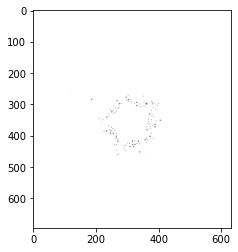

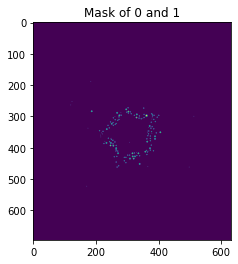

[[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
  0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

In [52]:
from helpers import png_to_mask

with zipfile.ZipFile(zipped_folder_path) as folder:
    
    # Just choose one random image
    index = 200
    
    # choose either embolism or ROI mask
    mask_type = '_emb'
    
    row = analysis_overview_df.iloc[index]
    
    png_filename = f'{png_masks_emb_zip_foldername}/{row.session}_{row.scan_nb}_{row.plant_name}_{row.image_nb}_mask{mask_type}.png'

    folder.extract(png_filename, path='temp', pwd=None)
    png_mask = cv.imread('temp/'+png_filename, cv.IMREAD_UNCHANGED)
    shutil.rmtree('temp')
    
    plt.imshow(png_mask) # Look at it for fun
    plt.show()

    # Now get the mask and fully expose it !
    with np.printoptions(threshold=np.inf):
        plt.imshow(png_to_mask(png_mask)) # Look at it for fun
        plt.title("Mask of 0 and 1")
        plt.show()
        print(png_to_mask(png_mask))